# IMPORT

In [7]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # linear regression (statsmodels)
from sklearn.model_selection import train_test_split, GridSearchCV # train/test split
from sklearn.linear_model import LinearRegression, Lasso, Ridge  # linear regression (scikit-learn)
import sklearn.linear_model as skl# linear models
import numpy as np
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.pipeline import Pipeline

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.11432,0.0,8.56,0.0,0.52,6.781,71.3,2.8561,5.0,384.0,20.9,395.58,7.67,26.5
1,0.22876,0.0,8.56,0.0,0.52,6.405,85.4,2.7147,5.0,384.0,20.9,70.80,10.63,18.6
2,0.21161,0.0,8.56,0.0,0.52,6.137,87.4,2.7147,5.0,384.0,20.9,394.47,13.44,19.3
3,0.13960,0.0,8.56,0.0,0.52,6.167,90.0,2.4210,5.0,384.0,20.9,392.69,12.33,20.1
4,0.13262,0.0,8.56,0.0,0.52,5.851,96.7,2.1069,5.0,384.0,20.9,394.05,16.47,19.5


## Import file

In [ ]:
# specifying file name
file = 'battle_royale_train.csv'

# reading the file into Python
housing = pd.read_csv(file)

# checking the file
housing.head(n = 5)

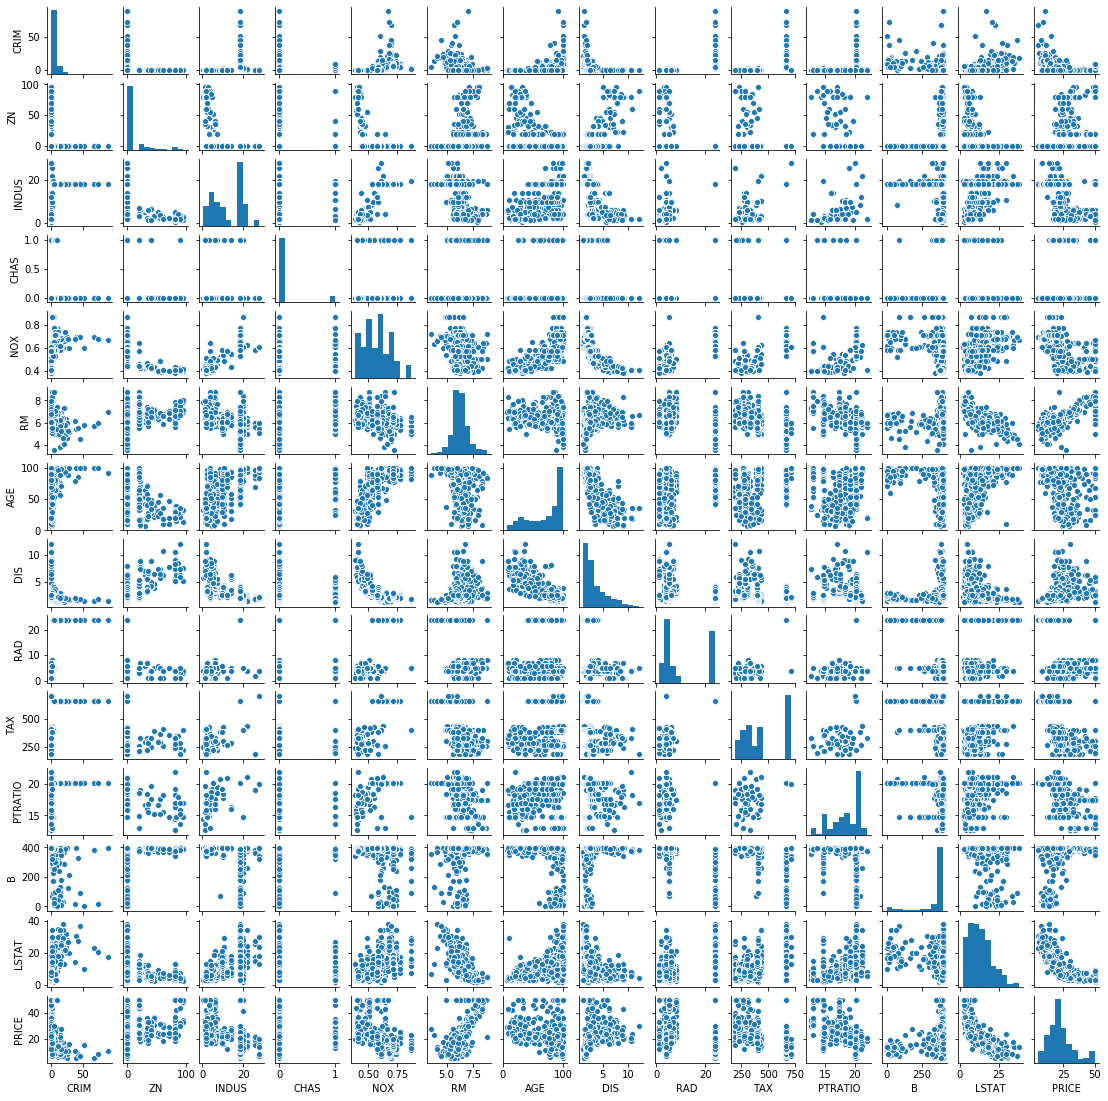

In [4]:
g = sns.pairplot(housing)
g.fig.set_size_inches(15,15)
plt.show()

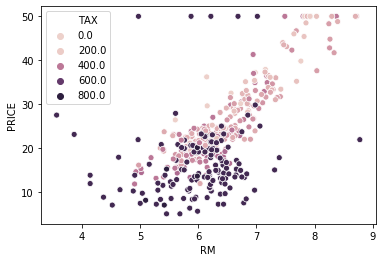

In [51]:
sns.scatterplot(housing['RM'], housing['PRICE'],hue=housing['TAX'])

# TRANSFORM

In [59]:
#Categorize
housing['up_RAD'] = 0
condition = housing.loc[0:,'up_RAD'][housing['RAD'] >= 20]
housing['up_RAD'].replace(to_replace = condition,
                                    value      = 1,
                                    inplace    = True)
#Square root
housing['sqrt_dis'] = np.sqrt(housing['DIS'])

#Log transformation
housing['log_price'] = (housing['PRICE']+1).transform(np.log)
housing['log_lstat'] = (housing['LSTAT']+1).transform(np.log)
housing['log_dis'] = (housing['DIS']+1).transform(np.log)

# PLOTTING

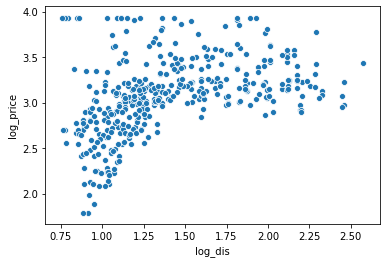

In [58]:
sns.scatterplot(housing['log_dis'], housing['log_price'])

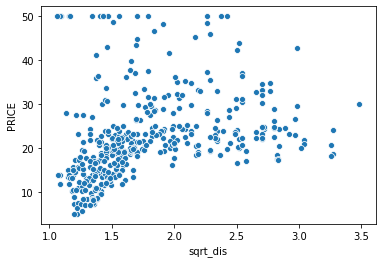

In [57]:
sns.scatterplot(housing['sqrt_dis'], housing['PRICE'])

# PREPARING TRAIN-TEST

In [60]:
# preparing explanatory variable data
housing_data = housing.drop(['PRICE','log_price'],
                               axis = 1)

# preparing response variable data
housing_target = housing.loc[:, 'PRICE']

# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            housing_data,
            housing_target,
            test_size = 0.25,
            random_state = 219)

# Training set 
print(X_train.shape)
print(y_train.shape)

# Testing set
print(X_test.shape)
print(y_test.shape)

(303, 17)
(303,)
(102, 17)
(102,)


In [61]:
# declaring set of x-variables
x_variables = [*housing.columns]

# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"housing_train['{val}'] +")


housing_train['CRIM'] +
housing_train['ZN'] +
housing_train['INDUS'] +
housing_train['CHAS'] +
housing_train['NOX'] +
housing_train['RM'] +
housing_train['AGE'] +
housing_train['DIS'] +
housing_train['RAD'] +
housing_train['TAX'] +
housing_train['PTRATIO'] +
housing_train['B'] +
housing_train['LSTAT'] +
housing_train['PRICE'] +
housing_train['log_price'] +
housing_train['log_lstat'] +
housing_train['log_dis'] +
housing_train['up_RAD'] +
housing_train['sqrt_dis'] +


In [66]:
# merging X_train and y_train so that they can be used in statsmodels
housing_train = pd.concat([X_train, y_train], axis = 1)

# Step 1: build a model
lm_best = smf.ols(formula =  """PRICE ~
housing_train['CRIM'] +
housing_train['ZN'] +
housing_train['INDUS'] +
housing_train['CHAS'] +
housing_train['NOX'] +
housing_train['RM'] +
housing_train['AGE'] +
housing_train['DIS'] +
housing_train['RAD'] +
housing_train['TAX'] +
housing_train['PTRATIO'] +
housing_train['B'] +
housing_train['LSTAT'] +
housing_train['log_lstat'] +
housing_train['log_dis'] +
housing_train['sqrt_dis']
""",
data = housing_train)

# Step 2: fit the model based on the data
results = lm_best.fit()

# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     73.91
Date:                Sun, 06 Sep 2020   Prob (F-statistic):           1.62e-91
Time:                        13:27:19   Log-Likelihood:                -873.71
No. Observations:                 303   AIC:                             1781.
Df Residuals:                     286   BIC:                             1845.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [76]:
# merging X_train and y_train so that they can be used in statsmodels
housing_train = pd.concat([X_train, y_train], axis = 1)

# Step 1: build a model
lm_best = smf.ols(formula =  """PRICE ~
housing_train['CRIM'] +
housing_train['CHAS'] +
housing_train['NOX'] +
housing_train['RM'] +
housing_train['DIS'] +
housing_train['AGE'] +
housing_train['RAD'] +
housing_train['TAX'] +
housing_train['PTRATIO'] +
housing_train['B'] +
housing_train['LSTAT'] +
housing_train['log_lstat'] +
housing_train['log_dis']
""",
data = housing_train)

# Step 2: fit the model based on the data
results = lm_best.fit()

# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     91.08
Date:                Sun, 06 Sep 2020   Prob (F-statistic):           5.58e-94
Time:                        13:31:31   Log-Likelihood:                -874.82
No. Observations:                 303   AIC:                             1778.
Df Residuals:                     289   BIC:                             1830.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

# TESTING MODELS

In [77]:
# preparing explanatory variable data

housing_data = housing[
['CRIM',
'CHAS',
'NOX',
'RM',
'DIS',
'AGE',
'RAD',
'TAX',
'PTRATIO',
'B',
'LSTAT',
'log_lstat',
'log_dis']]
# preparing response variable data
housing_target = housing.loc[:, 'PRICE']

# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            housing_data,
            housing_target,
            test_size = 0.25,
            random_state = 219)

# Training set 
print(X_train.shape)
print(y_train.shape)

# Testing set
print(X_test.shape)
print(y_test.shape)

(303, 13)
(303,)
(102, 13)
(102,)


## LASSO

In [89]:
# INSTANTIATING a model object
lasso_model = skl.Lasso()

# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)

# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_test)

print('Training Score:', lasso_model.score(X_train,y_train).round(4))
print('Testing Score:',  lasso_model.score(X_test,y_test).round(4))

# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(4)
lasso_test_score  = lasso_model.score(X_test, y_test).round(4)

Training Score: 0.6553
Testing Score: 0.7311


## RIDGE

In [79]:
# INSTANTIATING a model object
ridge_model = skl.Ridge()

# FITTING the training data
ridge_fit  = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_fit.predict(X_test)

print('Training Score:', ridge_model.score(X_train,y_train).round(4))
print('Testing Score:',  ridge_model.score(X_test,y_test).round(4))


# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ridge_model.score(X_test, y_test).round(4)

Training Score: 0.7941
Testing Score: 0.8467


## ARDRegression

In [88]:
# INSTANTIATING a model object
ard_model = skl.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(X_train, y_train)

# PREDICTING on new data
ard_pred = ard_fit.predict(X_test)


print('Training Score:', ard_model.score(X_train,y_train).round(4))
print('Testing Score:',  ard_model.score(X_test,y_test).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(X_train,y_train).round(4)
ard_test_score  = ard_model.score(X_test,y_test).round(4)

Training Score: 0.7993
Testing Score: 0.838


# FINAL MODEL - RIDGE

In [90]:
# INSTANTIATING a model object
ridge_model = skl.Ridge()

# FITTING the training data
ridge_fit  = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_fit.predict(X_test)

print('Training Score:', ridge_model.score(X_train,y_train).round(4))
print('Testing Score:',  ridge_model.score(X_test,y_test).round(4))


# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ridge_model.score(X_test, y_test).round(4)

Training Score: 0.7941
Testing Score: 0.8467
